In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set environment variables
import os

os.environ["SCAL_TYPE"] = "complex"
os.environ["PRECISION"] = "double"
os.environ["MY_NUMBA_TARGET"] = "numba"
 
# Add cle_fun to PYTHON_PATH
import sys
sys.path.append("../../clonscal")

In [2]:
from asdf.analytic import *
exact = Analytic()

from sympy import symbols, exp, sqrt, diff
from sympy.functions.special.bessel import besselk

sigma, lamda = symbols('sigma lamda')


In [3]:
xi = sigma**2 / (8 * lamda)
K_neg1_4 = besselk(-1/4, xi)
f_sigma = sqrt(4 * xi / sigma) * exp(xi) * K_neg1_4

exact.set_func('Z', f_sigma)

exact.n_moment_phi4('Z', sigma, 0)
exact.n_moment_phi4('Z', sigma, 2)
exact.n_moment_phi4('Z', sigma, 4)
exact.n_moment_phi4('Z', sigma, 6)

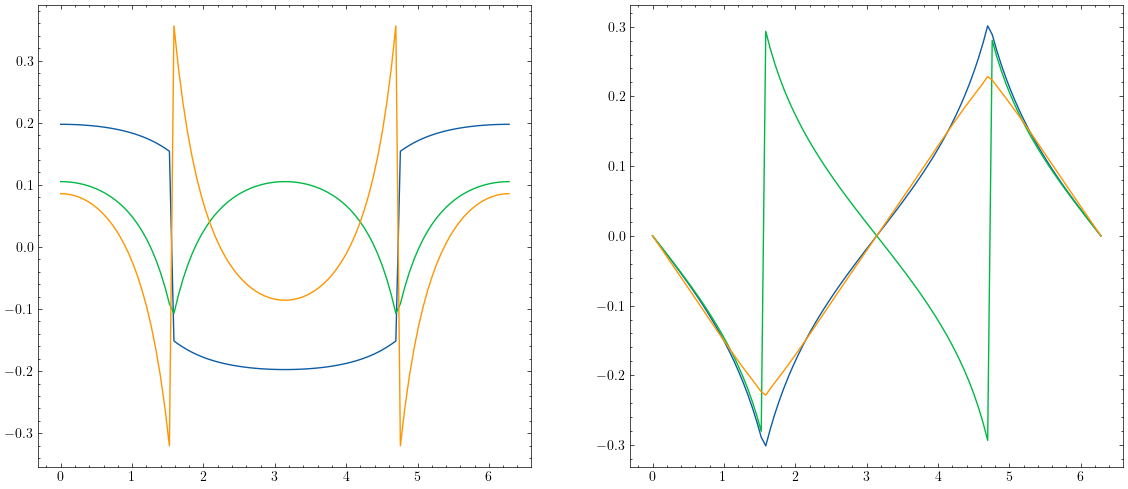

In [6]:
import scienceplots
import matplotlib.pyplot as plt
plt.style.use('science')

fig, axes = plt.subplots(1, 2, figsize=(14, 6)) 
angles = np.linspace(0, 2*np.pi, 100)
mass_abs = 4
masses = mass_abs * (np.cos(angles) + 1j*np.sin(angles))
for moment in range(2,8,2):
    name = f"{moment}_moment_phi4"
    vals = np.array([
        exact.eval(name, sigma=m, lamda=2) for m in masses
    ])

    axes[0].plot(angles, vals.real)
    axes[1].plot(angles, vals.imag)

# axes[0].set_ylim(-.25, 1.75)

In [ ]:
exact.funcs

{'Z': sqrt(2)*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/2,
 'Z_diff(sigma_0)': sqrt(2)*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/2,
 '0_moment_phi4': 1,
 '1_moment_phi4': 0,
 'Z_diff(sigma_1)': sqrt(2)*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/(4*sigma) + sqrt(2)*sigma*sqrt(sigma/lamda)*(-besselk(-1.25, sigma**2/(8*lamda))/2 - besselk(0.75, sigma**2/(8*lamda))/2)*exp(sigma**2/(8*lamda))/(8*lamda) + sqrt(2)*sigma*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/(8*lamda),
 '2_moment_phi4': sqrt(2)*(-sqrt(2)*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/(2*sigma) - sqrt(2)*sigma*sqrt(sigma/lamda)*(-besselk(-1.25, sigma**2/(8*lamda))/2 - besselk(0.75, sigma**2/(8*lamda))/2)*exp(sigma**2/(8*lamda))/(4*lamda) - sqrt(2)*sigma*sqrt(sigma/lamda)*exp(sigma**2/(8*lamda))*besselk(-0.25, sigma**2/(8*lamda))/(4*lamda))*exp(-sigma**2/(8*l